# Finite Difference Time Domain algorithm for solving the Schrodingers equation.

The SciPy Cookbook example from 2006 was not working so I decided to reimplement it and make it more flexible and expressive to use. The math is described [here](https://scipy-cookbook.readthedocs.io/_downloads/Schrodinger%5FFDTD.pdf). Bellow are just some examples of how it can be used.

In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np

from fdtd import Particle, Simulation, AnimateSim
from fdtd.potentials import *

from IPython.display import HTML

rc('animation', html='html5')
%matplotlib notebook

General usage is pretty basic. Create a Particle, create a Potential, initialize a simulation and then optionally animate it. The bigger the interval given to the animation, the longer the wait between two frames and the slower the animation goes.

<IPython.core.display.Javascript object>


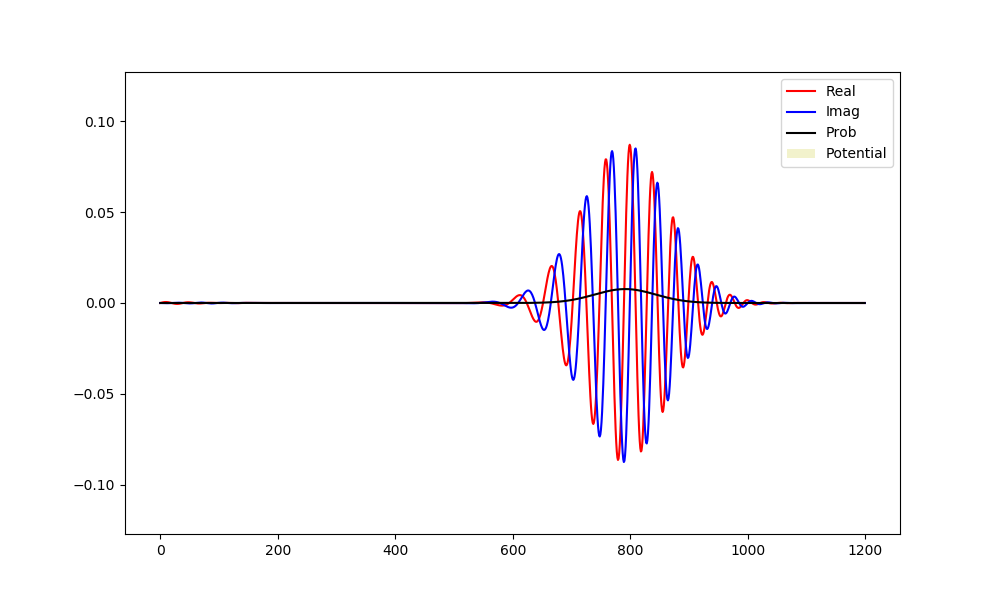

In [14]:
# required otherwise the plots don't display correctly
%matplotlib notebook

particle = Particle(400, 40, np.pi/20)
potential = NullPotential()
sim = Simulation(particle, [potential], T=5000)

anim = AnimateSim(sim, interval=10)

There are multiple kinds of potentials and opportunities to inherit from a general `Potential` and define your own. `Particle` defines our localized particle initial conditions and then `Simulation` runs the update equations. Read the docstrings they are extensive and usefull. `AnimateSim` can then be used to show the temporal revolution of our particle.

<IPython.core.display.Javascript object>


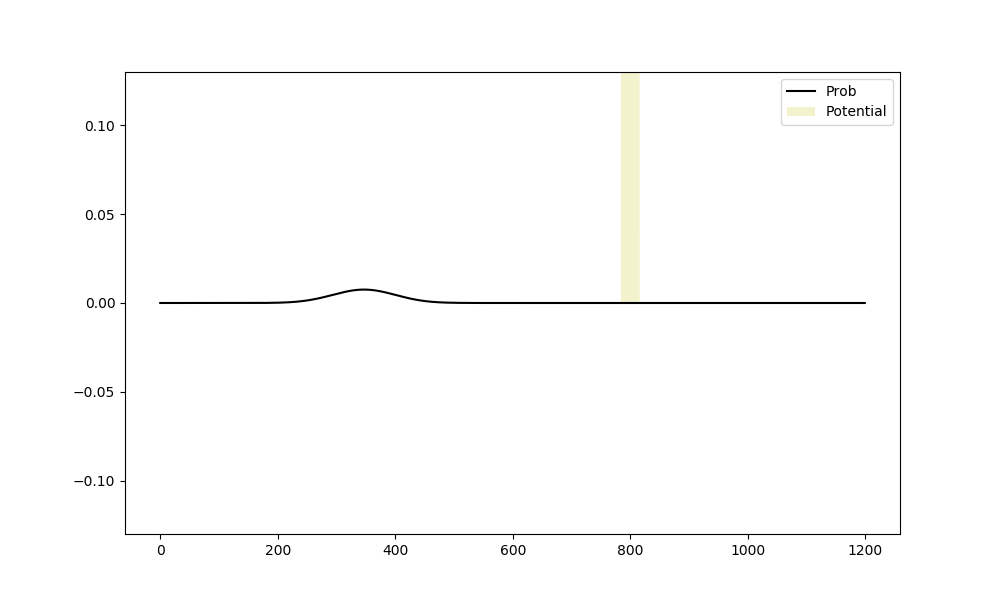

In [16]:
# required otherwise the plots don't display correctly
%matplotlib notebook

p = Particle(400, 40, np.pi/10)
b2 = BarrierPotential(1, 15, pos=800)
sim = Simulation(p, [b2], T=8000)

anim = AnimateSim(sim, deltaT=20, plot_real=False, plot_imag=False, interval=5, blit=True)

Tunneling will only occur if the particle has enough energy, so careful with the selection of initial parameters.

<IPython.core.display.Javascript object>


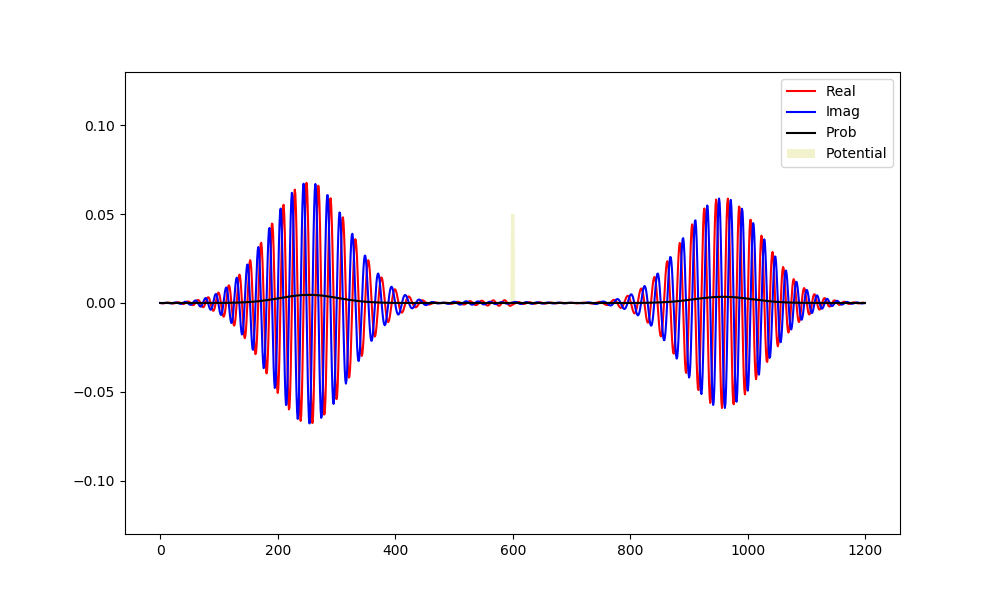

In [35]:
# required otherwise the plots don't display correctly
%matplotlib notebook

p = Particle(200, 40, np.pi/10)
b2 = BarrierPotential(0.05, 3, pos=600)
sim = Simulation(p, [b2], T=5000)

anim = AnimateSim(sim, interval=20, blit=True)

<IPython.core.display.Javascript object>


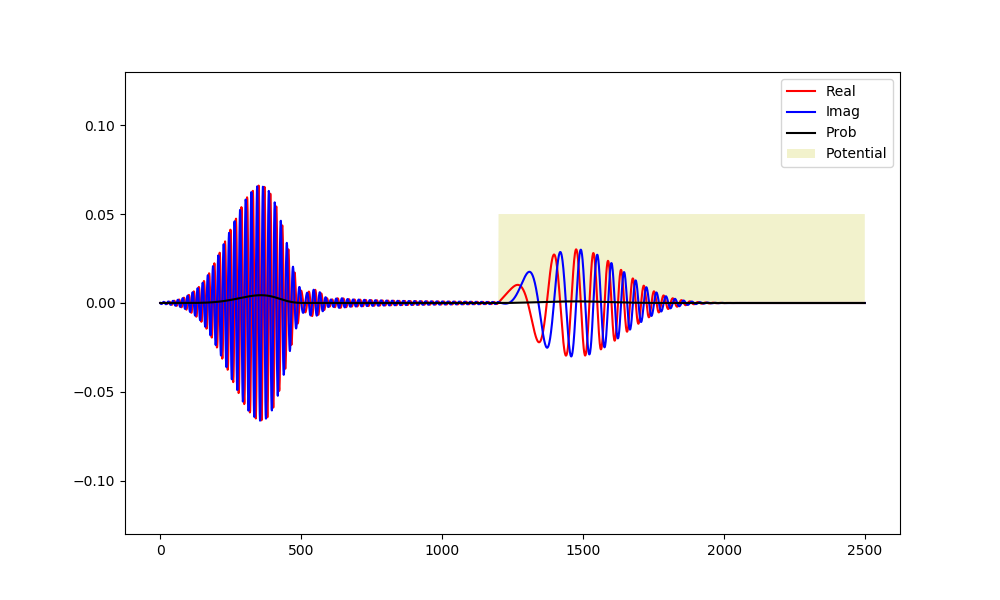

In [51]:
# required otherwise the plots don't display correctly
%matplotlib notebook

p = Particle(900, 40, np.pi/10)
b2 = StepPotential(0.05, pos=1200)
sim = Simulation(p, [b2], T=8000, N=2500)

anim = AnimateSim(sim, interval=10, blit=True)

Probably most interesting feature is stacking of potentials. For example the standing wave time average nodes of higher probailities for particles in a potential well are, kind of, hinted at if we do something like:

<IPython.core.display.Javascript object>


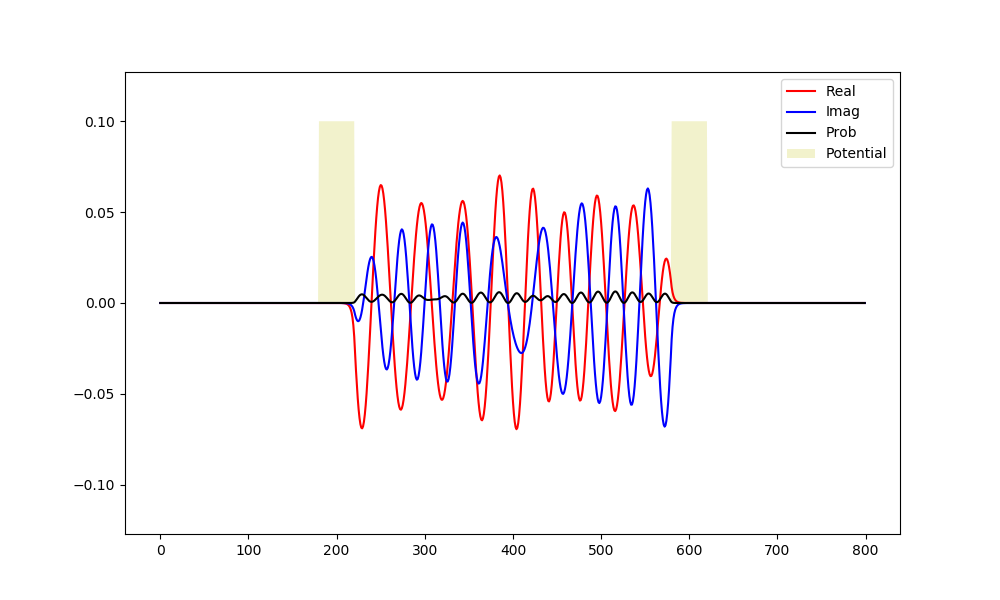

In [59]:
# required otherwise the plots don't display correctly
%matplotlib notebook

p = Particle(400, 40, np.pi/20)
b1 = BarrierPotential(0.1, width=20, pos=200)
b2 = BarrierPotential(0.1, width=20, pos=600)
sim = Simulation(p, [b1, b2], T=30000, N=800)

anim = AnimateSim(sim, interval=10, blit=True)